# Chapter 6: Decision Trees

---

## Introduction
**Decision Tress** is one of the most versatile algorothms in machine learning, they are considered the basis for **Random Forests** which is a powerful algorithm that can be compatible to **ANNs** in specific scenarios

---

## 6.1 Training & Visualization

In [97]:
# Importing the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import recall_score, classification_report, accuracy_score

In [98]:
# Loading data
data = load_iris(as_frame=True)

X = data.data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
DT = DecisionTreeClassifier(max_depth=2, random_state=42)

DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [99]:
# Evaluating
y_train_preds = DT.predict(X_train)
y_test_preds = DT.predict(X_test)

print("Train recall: ", recall_score(y_train, y_train_preds, average='macro'))
print("Test recall: ", recall_score(y_test, y_test_preds, average='macro'))

print(classification_report(y_test, y_test_preds))

Train recall:  0.9508025849489264
Test recall:  0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [100]:
# Graphing decision tree
export_graphviz(
    DT,
    out_file='Graphs/iris_DT.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=data.target_names,
    rounded=True,
    filled=True
)

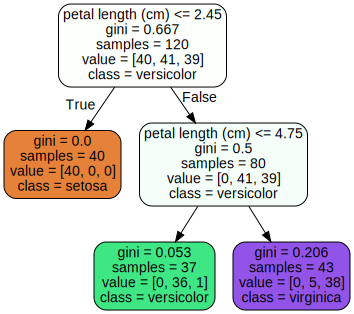

In [101]:
# Calling the graph
# pip install graphviz
from graphviz import Source

Source.from_file('Graphs/iris_DT.dot')

---

## 6.2 Make Predictions

**Here we can take some notes**

- We may notice that decision trees do not require much data preparation (e.g. feature scaling or centering

- The algorithm uses a metric called *Gini Impurity* to measure how much a class's instances are not of the same class typically a *gini=0* is a pure class

**Another thing to tell here** is that CART algorithm only produces binary tree (node only has two childrens)

***Decision tree algorithm is a white box algorithm (on the other han ANN & RF are black box ones) which means that we can interpret them and drive the steps that led to a prediction and understand how the model makes its predictions***

---

## 6.3 Estimating Clss probabilities

Another thing also we can do is to print the probability of each class that a specific instance is related to

In [102]:
DT.predict([[5.1, 3.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [103]:
DT.predict_proba([[5.1, 3.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.11627907, 0.88372093]])

---

## 6.4 CART Algorithm

CART algorithm has a cost of gini impurity of both nodes weighted by their size

***CART is a greedy algorithm which do not care about overall cost and focus only on the in hand cost which is considered a reasonably good solution but not optimal since a good step now may lead to bad outcomes in the end***

---

## 6.5 Computational Complexity

Making predictions require traversing the tree which is complex of *(O(log2(m)))* which makes predicting process very fast one

Training process uses all features to compare so when working with large datasets a hyperparameter called *mx_features* is settled to handle that

---

## 6.6 Gini Vs. Entropy

**There is no much differnece but we can see that**

- Gini is slightly faster than entropy

- entropy generates more balanced tree when gini tends to isolate most frequent class in its own branch

---

## 6.7 Why Hyperparameters?

A a decision tree with no constraints tends to overfit and such a model called non-parameteric model that fit
closely the data, so some limitations have to be be introduced to be a prarametric model to prune overfitting (but such model can increase the rist of underfitting)

Also there is pruning process for deleting unnecessary nodes using some statistical tests

In [104]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, random_state=42)

In [105]:
# Unregularized model
tree_clf1 = DecisionTreeClassifier(random_state=42)
# Regularized model
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [106]:
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [107]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [108]:
print("Unregularized model score: ", tree_clf1.score(X_moons_test, y_moons_test))
print("Regularized model score: ", tree_clf2.score(X_moons_test, y_moons_test))

Unregularized model score:  0.956
Regularized model score:  0.956


**We can see that there is no difference but it actually exists and appear in larger datasets**

---

## 6.8 Regression

**Decision Trees are also cabable of tackling regression tasks**

In [109]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad**2 + 0.025*np.random.rand(200, 1)

In [110]:
DT_reg = DecisionTreeRegressor(max_depth=3)
DT_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3)

In [111]:
export_graphviz(
    DT_reg,
    out_file='Graphs/DT_reg.dot',
    rounded=True,
    filled=True
)

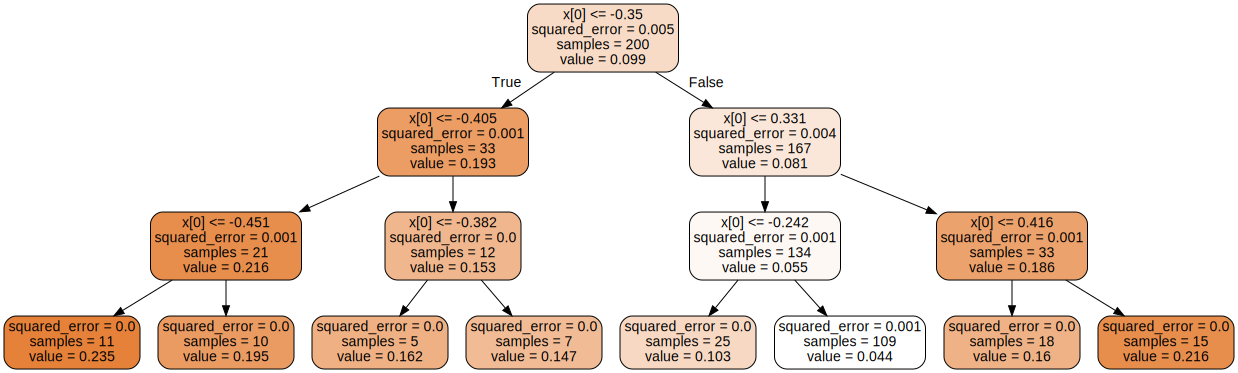

In [112]:
Source.from_file('Graphs/DT_reg.dot')

---

## 6.9 Sensitivity to Axis Orientation

Decision Trees are simple, versatile, and powerful, but they rely on axis-aligned splits, making them sensitive to data rotation. This can lead to poor generalization, which may be mitigated using techniques like Principal Component Analysis (PCA).

In [113]:
# Code
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Rotating data
data_pipe = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = data_pipe.fit_transform(X)

# DT model
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_clf.fit(X_iris_rotated, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [114]:
# Evalution
dt_clf.score(X_iris_rotated, y)

0.98

---

## 6.10 DT & High Variance

Decision Trees are highly sensitive to small changes in the training data, which can lead to drastically different models. Even removing a single data point can significantly alter the tree structure. Additionally, due to their stochastic nature, different runs on the same data can yield different trees unless random_state is set.

---

## Conclusion

Decision Trees are intuitive, easy to interpret, and versatile models that work well for both classification and regression tasks. However, they are prone to overfitting, sensitive to data variations and rotations, and can create unstable models. To improve performance and robustness, they are often used within ensemble methods like Random Forests or Gradient Boosted Trees.

---

## Practical Exercises

### Question 7

In [115]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [117]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

# Parameters to be tuned
param_grid = {
    'max_leaf_nodes': range(2, 128)
}

# Setting the search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(2, 128)})

In [118]:
# Predictions on train and test sets
y_train_preds = grid_search.predict(X_train)
y_test_preds = grid_search.predict(X_test)

In [119]:
# Evaluating
print("Train recall: ", accuracy_score(y_train, y_train_preds))
print("Test recall: ", accuracy_score(y_test, y_test_preds))

print(classification_report(y_test, y_test_preds))

Train recall:  0.866
Test recall:  0.8735
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1013
           1       0.86      0.88      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



**Excersice requirements are satisfied (Accuracy of 87%)**

---

### Question 8

In [120]:
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# setting the split
n_trees = 1000
n_instances = 100

mini_sets = []

random_shuffle = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
splits = random_shuffle.split(X_train)

# Random Splitting
for train_index, test_index in splits:
  miniX_train = X_train[train_index]
  miniy_train = y_train[train_index]
  mini_sets.append((miniX_train, miniy_train))

In [121]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for DT, (train_set, test_set) in zip(forest, mini_sets):
  DT.fit(train_set, test_set)

  y_pred = DT.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))
else:
  print("Average scores is: ", np.mean(accuracy_scores))

Average scores is:  0.7986555


In [122]:
from scipy.stats import mode

# Modal predictions
y_preds = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for index, tree in enumerate(forest):
  y_preds[index] = tree.predict(X_test)
else:
  y_majority_votes, n_votes = mode(y_preds, axis=0)

In [123]:
# interpreting accuracy result
print("Accuracy is: ", accuracy_score(y_test, y_majority_votes))

Accuracy is:  0.8725


Accuracy is higher by approximately 1.5%